<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%208%3A%20Image%20Analysis/8_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Analysis**
##Image Processing 

This notebook contains examples of topics covered in CH-8.

### 8.1 Introduction to Image Processing

In [ ]:
%matplotlib inline
 
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.io import imread   
 
figure  = plt.figure
subplot = plt.subplot
imshow  = plt.imshow
hist    = plt.hist
plot    = plt.plot


In [ ]:
url=   'https://drive.google.com/file/d/1LIdKmyMoALI8knowUo0ND0Ulc_xW2C9B/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#df = pd.read_csv(path)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe548fb7950>,
 <matplotlib.image.AxesImage at 0x7fe548628f50>)

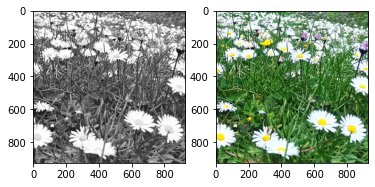

In [ ]:
I_gry = imread(path , as_gray = True)
I_clr = imread(path )
 
figure('Figure 8.1 and 8.2')
subplot(1,2,1) , imshow(I_gry , cmap = 'gray')
subplot(1,2,2) , imshow(I_clr  )

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe5485fcdd0>,
 [<matplotlib.lines.Line2D at 0x7fe547105090>])

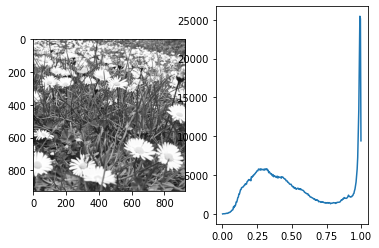

In [ ]:
from skimage import exposure

hist_gry , bins  = exposure.histogram(I_gry)

figure('Figure 8.3(a) and (b)')
subplot(1,2,1) , imshow(I_gry , cmap = 'gray')
subplot(1,2,2) , plot( bins , hist_gry  )

 

Histogram of a image shows pixel number of related intensity

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe547018990>,
 <matplotlib.image.AxesImage at 0x7fe547010910>)

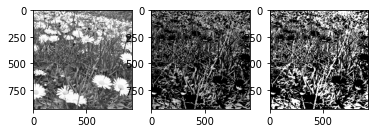

In [ ]:
Ib = np.zeros_like(I_gry)
Ic = np.zeros_like(I_gry)

img_region = (255*I_gry >= 100) & (255*I_gry <= 220)


Ib[img_region] = I_gry[img_region]
Ic[img_region] = 1

 
figure('Figure 8.5(a) (b) and (c)')
subplot(1,3,1) , imshow(I_gry , cmap = 'gray')
subplot(1,3,2) , imshow(Ib    , cmap = 'gray' )
subplot(1,3,3) , imshow(Ic    , cmap = 'gray' )

 

Thresholding can be done not only with one number, but also on two numbers.

### 8.2 Image Filtering


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53f8f88d0>,
 <matplotlib.image.AxesImage at 0x7fe53f873a90>)

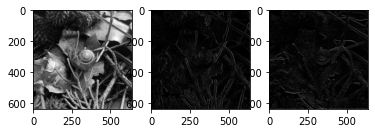

In [ ]:
from scipy import signal as sg  
url2=   'https://drive.google.com/file/d/1SofMc2Ig5MG5_-yFz41D3FNTkPCxmVNE/view?usp=sharing'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
I_gry = imread(path2 ,as_gray = True)

hx = np.array([[-1,0,1]])
hy = hx.T

I_gx = sg.convolve2d(I_gry, hx, mode='same')
I_gy = sg.convolve2d(I_gry, hy, mode='same')

figure('Figure 8.9(a) (b) and (c)')
subplot(1,3,1) , imshow(I_gry , cmap = 'gray')
subplot(1,3,2) , imshow(np.abs(I_gx) , cmap = 'gray')
subplot(1,3,3) , imshow(np.abs(I_gy) , cmap = 'gray')





In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.io import imread   
from  scipy.fft import fft2 , fftshift
 
figure  = plt.figure
subplot = plt.subplot
imshow  = plt.imshow
hist    = plt.hist
plot    = plt.plot

pi  = np.pi
cos = np.cos
sin = np.sin 
exp = np.exp 


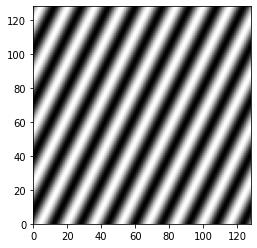

In [ ]:
 
Nt             = 128 
grid_range     = np.arange(0 , Nt+1 )
[nx,ny]        = np.meshgrid( grid_range , grid_range )

Nx0 = 16   # 32    for 8.10(b)
Ny0 = 32   # 128   for 8.10(b)

fx0 = 1/Nx0
fy0 = 1/Ny0

wx0 = 2*pi*fx0
wy0 = 2*pi*fy0
 
I = sin(wx0*nx + wy0*ny)

figure("Figure 8.10(a)")
imshow(I, cmap = 'gray',
       extent = [grid_range.min() , grid_range.max() , grid_range.min() , grid_range.max() ] )



(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53f7cde10>,
 <matplotlib.image.AxesImage at 0x7fe53f719850>)

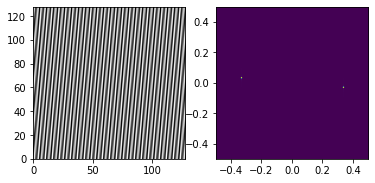

In [ ]:
Nx0 = 3  
Ny0 = 32

fx0 = 1/Nx0
fy0 = 1/Ny0

wx0 = 2*pi*fx0
wy0 = 2*pi*fy0
 
I   = sin(wx0*nx + wy0*ny)
F_I = fftshift(np.abs(fft2(I)))


figure("Figure 8.11(a) and (b)")
subplot(1,2,1) , imshow(I, cmap = 'gray',
       extent = [grid_range.min() , grid_range.max() , grid_range.min() , grid_range.max() ] )

subplot(1,2,2) , imshow(F_I , extent = [-0.5 , 0.5 , -0.5 , 0.5 ])

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53f6fe410>,
 <matplotlib.image.AxesImage at 0x7fe53f6659d0>)

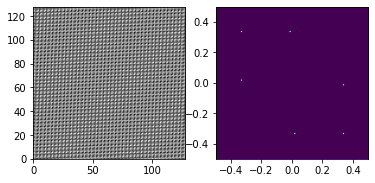

In [ ]:
Nx0 = np.array([3 , 3 , 64])
Ny0 = np.array([64 ,3 , 3])

wx0 = 2*pi/Nx0
wy0 = 2*pi/Ny0

I3 = np.zeros((Nt+1,Nt+1))

for i in range(len(Nx0)):
    
    I3 = I3 + sin(wx0[i]*nx + wy0[i]*ny)
    
F_I = fftshift(np.abs(fft2(I3)))

figure("Figure 8.12(a) and (b)")
subplot(1,2,1) , imshow(I3, cmap = 'gray',
       extent = [grid_range.min() , grid_range.max() , grid_range.min() , grid_range.max() ] )
subplot(1,2,2) , imshow(F_I , extent = [-0.5 , 0.5 , -0.5 , 0.5 ])

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53f3b9210>,
 <matplotlib.image.AxesImage at 0x7fe53f32d610>)

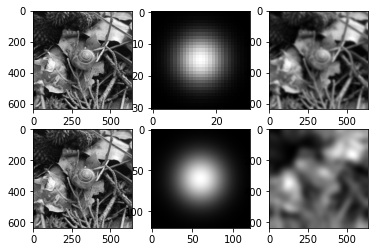

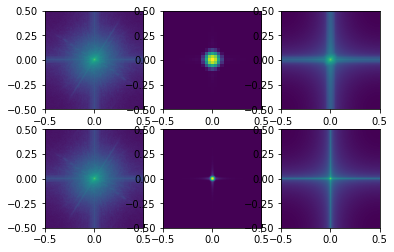

In [ ]:

url2=   'https://drive.google.com/file/d/1SofMc2Ig5MG5_-yFz41D3FNTkPCxmVNE/view?usp=sharing'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
#Ix = cv.imread(path2,0)
Ix = imread(path2,0)

Ix = Ix[:,:,0]

Ix = Ix / Ix.max()

 
sgm   = 5
 
xv,yv = np.meshgrid( np.arange( -3*sgm , 3*sgm+1 ) , np.arange( -3*sgm , 3*sgm+1 ) ) 
h_gs1 = np.exp( - (xv**2+yv**2) / (2*sgm**2))   
 
sgm   = 20
 
xv,yv = np.meshgrid( np.arange( -3*sgm , 3*sgm+1 ) , np.arange( -3*sgm , 3*sgm+1 ) ) 
h_gs2 = np.exp( - (xv**2+yv**2) / (2*sgm**2))  


Iy1   = cv.filter2D(Ix, -1 , h_gs1)
Iy2   = cv.filter2D(Ix, -1 , h_gs2)

F_Ix  = fftshift(np.abs(fft2(Ix)))
F_Iy1 = fftshift(np.abs(fft2(Iy1)))
F_Iy2 = fftshift(np.abs(fft2(Iy2)))
F_H1  = fftshift(np.abs(fft2(h_gs1))) 
F_H2  = fftshift(np.abs(fft2(h_gs2)))

plt.figure('Figure 8.14 and 8.15: Spatial Effect of Filtering')
plt.subplot(2,3,1) , plt.imshow(  Ix     , cmap = 'gray'  )
plt.subplot(2,3,2) , plt.imshow(  h_gs1  , cmap = 'gray'  )
plt.subplot(2,3,3) , plt.imshow(  Iy1    , cmap = 'gray'  )

plt.subplot(2,3,4) , plt.imshow(  Ix     , cmap = 'gray'  )
plt.subplot(2,3,5) , plt.imshow(  h_gs2  , cmap = 'gray'  )
plt.subplot(2,3,6) , plt.imshow(  Iy2    , cmap = 'gray'  )
 

plt.figure('Figure 8.14 and 8.15: Frequency Analysis of Filters ')
plt.subplot(2,3,1) , plt.imshow( np.log(F_Ix+1)  , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,2) , plt.imshow( np.log(F_H1+1)  , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,3) , plt.imshow( np.log(F_Iy1+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )

plt.subplot(2,3,4) , plt.imshow( np.log(F_Ix+1)  , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,5) , plt.imshow( np.log(F_H2+1)  , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,6) , plt.imshow( np.log(F_Iy2+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )

In [ ]:
type(Iy1)

numpy.ndarray

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53f1192d0>,
 <matplotlib.image.AxesImage at 0x7fe53f0953d0>)

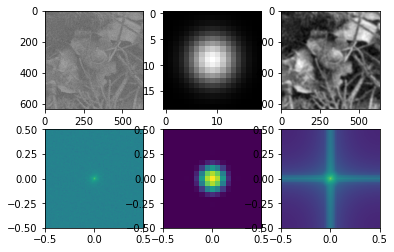

In [ ]:

Ix = imread(path2,0)
Ix = Ix[:,:,0] 
Ix = Ix / Ix.max()

Ix = Ix + 0.5*np.random.randn( np.shape(Ix)[0] , np.shape(Ix)[1])

sgm   = 3
 
xv,yv = np.meshgrid( np.arange( -3*sgm , 3*sgm+1 ) , np.arange( -3*sgm , 3*sgm+1 ) ) 
h_gs  = np.exp( - (xv**2+yv**2) / (2*sgm**2))   

Iy   = cv.filter2D(Ix, -1 , h_gs1)

F_Ix = fftshift(np.abs(fft2(Ix)))
F_Iy = fftshift(np.abs(fft2(Iy)))
F_H  = fftshift(np.abs(fft2(h_gs))) 

plt.figure('Figure 8.16: Noise removal by using LPF')
plt.subplot(2,3,1) , plt.imshow(  Ix    , cmap = 'gray'  )
plt.subplot(2,3,2) , plt.imshow(  h_gs  , cmap = 'gray'  )
plt.subplot(2,3,3) , plt.imshow(  Iy    , cmap = 'gray'  )

plt.subplot(2,3,4) , plt.imshow( np.log(F_Ix+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,5) , plt.imshow( np.log(F_H+1)  , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,6) , plt.imshow( np.log(F_Iy+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )

In [ ]:
url3=   'https://drive.google.com/file/d/1VKpn2tWwKt2mqAlcZHV3EowBXfXzaYjW/view?usp=sharing'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
Ix = imread(path3,0)
Ix = Ix[:,:,0]
#Ix = cv.imread('Text.png' , 0)

Nxo = np.array([    4,8,16    ])
Nyo = np.array([    4,8,16    ])

N = 512

xv,yv = np.meshgrid( np.arange(0,N) , np.arange(0,N) )

I = np.zeros((N ,N ))

for i,fxo in enumerate(1/Nxo):
    for j,fyo in enumerate(1/Nyo):
        
        I = I + cos(2*pi*(fxo*xv + fyo*yv) )

In [ ]:
type(Ix)

numpy.ndarray

In [ ]:
Ix.ndim

2

In [ ]:
type(I)

numpy.ndarray

In [ ]:
print(I)

[[ 9.          4.89295894 -0.87867966 ... -0.97327005 -0.87867966
   4.89295894]
 [ 4.89295894 -1.70710678 -4.04519988 ...  0.78949898  3.08979021
   7.02733949]
 [-0.87867966 -4.04519988 -2.82842712 ...  1.17218241  3.
   3.08979021]
 ...
 [-0.97327005  0.78949898  1.17218241 ... -0.29289322 -0.98213962
  -1.84775907]
 [-0.87867966  3.08979021  3.         ... -0.98213962 -2.82842712
  -4.04519988]
 [ 4.89295894  7.02733949  3.08979021 ... -1.84775907 -4.04519988
  -1.70710678]]


In [ ]:
I.size

262144

In [ ]:
I.ndim

2

In [ ]:
Ix = 500*I+Ix

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53ed39510>,
 <matplotlib.image.AxesImage at 0x7fe53ecb48d0>)

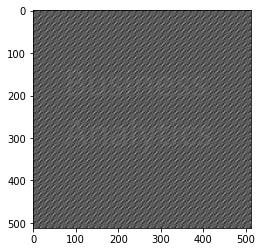

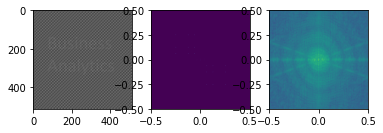

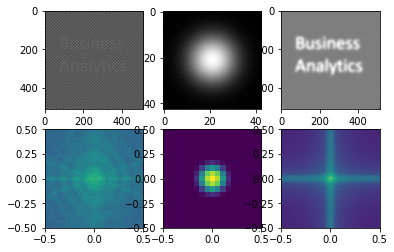

In [ ]:
#url3=   'https://drive.google.com/file/d/1VKpn2tWwKt2mqAlcZHV3EowBXfXzaYjW/view?usp=sharing'
#path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
#Ix = cv.imread(path3,0)
#Ix = cv.imread('Text.png' , 0)

#Nxo = np.array([    4,8,16    ])
#Nyo = np.array([    4,8,16    ])

#N = 512

#xv,yv = np.meshgrid( np.arange(0,N) , np.arange(0,N) )

#I = np.zeros((N ,N ))

#for i,fxo in enumerate(1/Nxo):
 #   for j,fyo in enumerate(1/Nyo):
        
  #      I = I + cos(2*pi*(fxo*xv + fyo*yv) )
         
#Ix = 500*I+Ix

#yukariya alip tek tek denedigim icin burada commente cevirdim
     
plt.figure()
plt.imshow( Ix , cmap = 'gray'  )

F_Ix = fftshift(np.abs(fft2(Ix)))

plt.figure('Revealing Hidden Text-1')
plt.subplot(1,3,1) , plt.imshow( Ix             , cmap = 'gray'  )
plt.subplot(1,3,2) , plt.imshow( F_Ix           , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(1,3,3) , plt.imshow( np.log(F_Ix+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )

sgm   = 7
xv,yv = np.meshgrid( np.arange( -3*sgm , 3*sgm+1 ) , np.arange( -3*sgm , 3*sgm+1 ) ) 
h_gs  = exp( - (xv**2+yv**2) / (2*sgm**2)) 

Iy = cv.filter2D(Ix,-1,h_gs)

plt.figure('Figure 8.17 and 8.18 Hidden Image Extracting by Using LPF')
plt.subplot(2,3,1) , plt.imshow(  Ix    , cmap = 'gray'  )
plt.subplot(2,3,2) , plt.imshow(  h_gs  , cmap = 'gray'  )
plt.subplot(2,3,3) , plt.imshow(  Iy    , cmap = 'gray'  )

plt.subplot(2,3,4) , plt.imshow( np.log(F_Ix+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,5) , plt.imshow( np.log(F_H+1)  , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,6) , plt.imshow( np.log(F_Iy+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53eb07410>,
 <matplotlib.image.AxesImage at 0x7fe53ea7e550>)

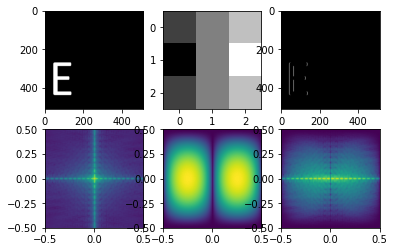

In [ ]:
url4=   'https://drive.google.com/file/d/1DLZmn_vfL6pMnhJkLzb3xyOnvMjsKDgR/view?usp=sharing'
path4 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
Ix = imread(path4,0)
Ix = Ix[:,:,0]
#Ix   = cv.imread('Letter_E.png',0)
Ix = Ix/np.max(Ix)

h_hp = np.array( [ [-1,0,1] , [-2, 0, 2] , [-1,0, 1]])
# h_hp = np.array( [ [0,-1,0] , [-1, 4, -1] , [0,-1, 0]])

Iy   = cv.filter2D(Ix, -1 , h_hp)

F_Ix = fftshift(np.abs(fft2( Ix )))
F_Iy = fftshift(np.abs(fft2( Iy )))
F_Hs = fftshift(np.abs(fft2( h_hp , np.shape(Ix) ))) 

plt.figure('Figure 8.20 Frequency Analysis of Sobel Filter')
plt.subplot(2,3,1) , plt.imshow( Ix         , cmap = 'gray'  )
plt.subplot(2,3,2) , plt.imshow( h_hp       , cmap = 'gray'  )
plt.subplot(2,3,3) , plt.imshow( np.abs(Iy) , cmap = 'gray'  )

plt.subplot(2,3,4) , plt.imshow( np.log(F_Ix+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,5) , plt.imshow( np.log(F_Hs+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,6) , plt.imshow( np.log(F_Iy+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53e8e4a50>,
 <matplotlib.image.AxesImage at 0x7fe53f539190>)

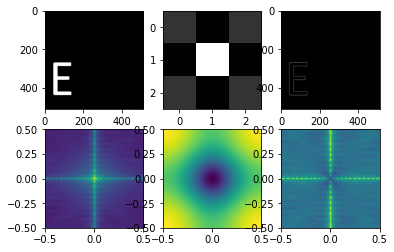

In [ ]:
Ix   = imread(path4,0)
Ix = Ix[:,:,0]
Ix = Ix/np.max(Ix)

#h_hp = np.array( [ [-1,0,1] , [-2, 0, 2] , [-1,0, 1]])
h_hp = np.array( [ [0,-1,0] , [-1, 4, -1] , [0,-1, 0]])

Iy   = cv.filter2D(Ix, -1 , h_hp)

F_Ix = fftshift(np.abs(fft2( Ix )))
F_Iy = fftshift(np.abs(fft2( Iy )))
F_Hs = fftshift(np.abs(fft2( h_hp , np.shape(Ix) ))) 

plt.figure('Figure 8.21 Frequency Analysis of Laplacian Filter')
plt.subplot(2,3,1) , plt.imshow( Ix         , cmap = 'gray'  )
plt.subplot(2,3,2) , plt.imshow( h_hp       , cmap = 'gray'  )
plt.subplot(2,3,3) , plt.imshow( np.abs(Iy) , cmap = 'gray'  )

plt.subplot(2,3,4) , plt.imshow( np.log(F_Ix+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,5) , plt.imshow( np.log(F_Hs+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,6) , plt.imshow( np.log(F_Iy+1) , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53eea2a10>,
 <matplotlib.image.AxesImage at 0x7fe53f62dcd0>)

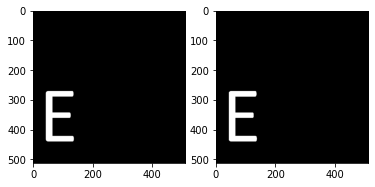

In [ ]:
url5=   'https://drive.google.com/file/d/1SofMc2Ig5MG5_-yFz41D3FNTkPCxmVNE/view?usp=sharing'
path5 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
Ix   = imread(path5,0)  # I2 yok hatası geliyor.
Ix = Ix[:,:,0]
h_sh = np.array( [ [0,-1,0] , [-1, 5, -1] , [0,-1, 0]])

Iy   = cv.filter2D(Ix, -1 , h_sh)

F_Ix = fftshift(np.abs(fft2( Ix )))
F_Iy = fftshift(np.abs(fft2( Iy )))
F_Hs = fftshift(np.abs(fft2( h_sh , np.shape(Ix) ))) 

plt.figure('Figure 8.22(a) and (b): Image Sharpening')
plt.subplot(1,2,1) , plt.imshow( Ix    , cmap = 'gray'  )
plt.subplot(1,2,2) , plt.imshow( Iy    , cmap = 'gray'  )


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53f348690>,
 <matplotlib.image.AxesImage at 0x7fe53f6f5b10>)

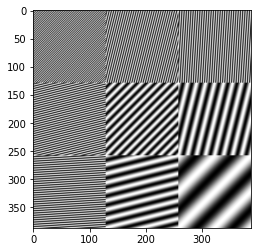

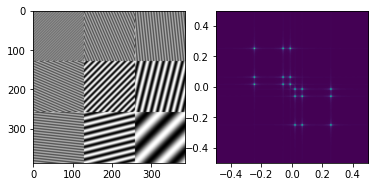

In [ ]:
Nxo = np.array([  4, 16 , 64  ])
Nyo = np.array([  4, 16 , 64  ])

N = 128

xv,yv = np.meshgrid( np.arange(0,N+1) , np.arange(0,N+1) )

for i,fxo in enumerate(1/Nxo):
    for j,fyo in enumerate(1/Nyo):
        
        I_tmp = cos(2*pi*(fxo*xv + fyo*yv) )
        
        if not(j):
            I = I_tmp
        else:
            I = np.c_[I,I_tmp]
    
    if not(i):
        Ix = I
    else:
        Ix = np.r_[Ix,I]
        
plt.figure()
plt.imshow(Ix, cmap = 'gray'  )
            
F_Ix = fftshift(np.abs(fft2(Ix, s = (512,512) )))

plt.figure('Figure 8.25(a) and (b)')
plt.subplot(1,2,1) , plt.imshow( Ix, cmap = 'gray' ) 
plt.subplot(1,2,2) , plt.imshow( F_Ix  , extent = [-0.5 , 0.5 , -0.5 , 0.5 ]) 


In the example below, Figure 8.25, 8.26 and 8.27 can be produced by making the $\sigma$ value 10, 5 and 2 respectively.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53e797a90>,
 <matplotlib.image.AxesImage at 0x7fe53e791e50>)

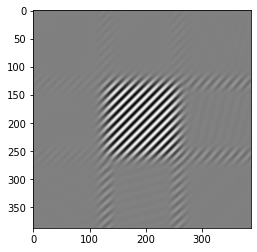

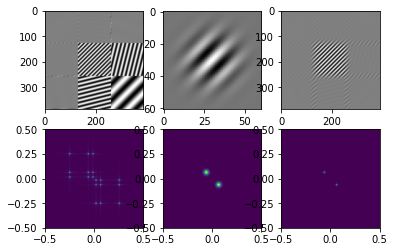

In [ ]:

fxo = 1/16
fyo = 1/16

sgm   = 10 # 5  2
xv,yv = np.meshgrid( np.arange( -3*sgm , 3*sgm+1 ) , np.arange( -3*sgm , 3*sgm+1 ) ) 
h_gs  = exp( - (xv**2+yv**2) / (2*sgm**2))  

c     = cos(2*pi*(fxo*xv + fyo*yv))
h_gb  = h_gs*c  
Iy    = cv.filter2D(Ix,-1,h_gb)

F_Ix = fftshift(np.abs(fft2( Ix )))
F_Iy = fftshift(np.abs(fft2( Iy )))
F_Hs = fftshift(np.abs(fft2( h_gb , np.shape(Ix) ))) 

plt.figure()
plt.imshow(Iy, cmap = 'gray'  )

plt.figure('Figure 8.26: Gabor Filter Examples')
plt.subplot(2,3,1) , plt.imshow( Ix         , cmap = 'gray'  )
plt.subplot(2,3,2) , plt.imshow( h_gb       , cmap = 'gray'  )
plt.subplot(2,3,3) , plt.imshow( Iy         , cmap = 'gray'  )

plt.subplot(2,3,4) , plt.imshow( F_Ix , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,5) , plt.imshow( F_Hs , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )
plt.subplot(2,3,6) , plt.imshow( F_Iy , extent = [-0.5 , 0.5 , -0.5 , 0.5 ] )

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe53b957810>,
 <matplotlib.image.AxesImage at 0x7fe53b8d1790>)

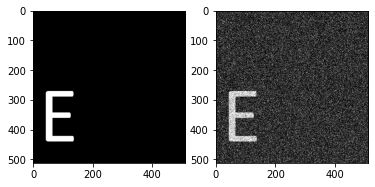

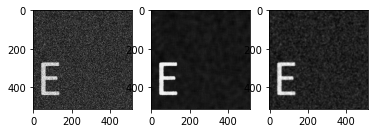

In [ ]:
from skimage.util import random_noise
from skimage.restoration import denoise_nl_means, denoise_tv_chambolle, estimate_sigma

url5=   'https://drive.google.com/file/d/1SofMc2Ig5MG5_-yFz41D3FNTkPCxmVNE/view?usp=sharing'
path5 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
Ix   = imread(path5,0) 
Ix = Ix[:,:,0]

sigma = 0.5
In = random_noise(Ix, var = sigma**2)

plt.figure('Advanced Filtering Techniques-1')
plt.subplot(1,2,1) , plt.imshow( Ix  , cmap = 'gray' ) 
plt.subplot(1,2,2) , plt.imshow( In  , cmap = 'gray') 


sigma_est = np.mean(estimate_sigma(In))
I_NL  = denoise_nl_means(In, h=0.8*sigma_est, sigma=sigma_est, fast_mode=True)

I_TV = denoise_tv_chambolle(In, weight=0.5 )


plt.figure('Advanced Filtering Techniques-2')
plt.subplot(1,3,1) , plt.imshow( In    , cmap = 'gray' ) 
plt.subplot(1,3,2) , plt.imshow( I_NL  , cmap = 'gray') 
plt.subplot(1,3,3) , plt.imshow( I_TV  , cmap = 'gray') 

### 8.3 Image Segmentation

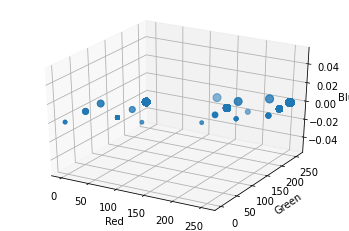

In [ ]:
url5=   'https://drive.google.com/file/d/1SofMc2Ig5MG5_-yFz41D3FNTkPCxmVNE/view?usp=sharing'
path5 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
Ix   = imread(path5,0) 
Nx,My,D    = np.shape(Ix)
vector_pix = Ix.reshape(Nx*My,-1)


fig = plt.figure('Figure 8.33(b)')
ax  = fig.add_subplot(projection='3d')

plt.scatter(vector_pix[:,0] , vector_pix[:,1] , vector_pix[:,2] , marker = '.')

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')


plt.show()


Text(0.5, 0, 'Blue')

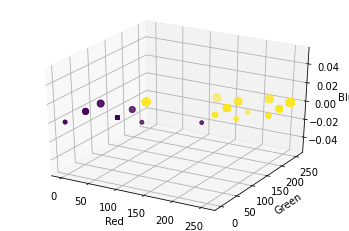

In [ ]:
from sklearn.cluster import KMeans

kmeans_result = KMeans(n_clusters=2, random_state=0).fit(vector_pix)
labels = kmeans_result.labels_


fig = plt.figure('Figure 8.34(b)')
ax  = fig.add_subplot(projection='3d')

plt.scatter(vector_pix[:,0] , vector_pix[:,1] , vector_pix[:,2] , marker = '.' , c=labels.astype(float))

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x7f2f272fd310>,
 <matplotlib.image.AxesImage at 0x7f2f272e7750>)

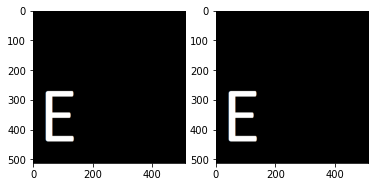

In [ ]:
#Ix = imread('I2.png')
url5=   'https://drive.google.com/file/d/1SofMc2Ig5MG5_-yFz41D3FNTkPCxmVNE/view?usp=sharing'
path5 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
Ix   = imread(path5,0) 
Ix = np.array(Ix, dtype=np.float64) / 255

Nx,My,D    = np.shape(Ix)
vector_pix = Ix.reshape(Nx*My,-1)

k_center = 16
kmeans_result  = KMeans(n_clusters=k_center, random_state=0).fit(vector_pix)
labels  = kmeans_result.labels_
centers = kmeans_result.cluster_centers_

Iz = centers[labels].reshape(Nx,My, -1)

plt.figure('Figure 8.35: (a)(b) and (c) can be produced while k_center is selected as 5, 16, 32 respectively')
plt.subplot(1,2,1) , plt.imshow( Ix ) 
plt.subplot(1,2,2) , plt.imshow( Iz ) 